# Facets of Mathematics| Regression Modeling

## End of theme assessment

Your completed assessment should consist of

1. This completed Jupyter notebook, including all requested code.
2. A LaTeX document containing the requested explanations. You can use `reg_eot.tex` as a starting point. The final document must be **no longer than five pages**, including all figures - a complete well formatted document may be significantly shorter than this page limit.

You can save an image using the `savefig` function, e.g.

```
plt.savefig("test.png") or ax.savefig("test.png")
```

and then e.g. download the figure from Noteable, and upload it to Overleaf, to include it in your LaTeX document. It is recommended that you save images in the lossless PNG format.

## Submission

Please upload **both** your final compiled PDF, **and** your completed Jupyter notebook, via Learn.

You can download your completed Jupyter notebook from Noteable using `File` $\rightarrow$ `Download as` $\rightarrow$ `Notebook (.ipynb)`.

## Marking

This assessment is marked out of 15. Marks will be based on

**10 marks** Completeness and correctness.
- Questions should be answered fully and correctly.
- The discussion should be complete, relevant, and correct.
- You should justify decisions you make in your discussion, and correctly describe the methods used.
- All code should be clear, correct, and appropriately commented.

**5 marks** Presentation and use of LaTeX.
- LaTeX should be used correctly and appropriately.
- Figures should be included, with appropriate sizing, captions, and referred to in the text where appropriate.
- Text should be in grammatical sentences and free of typographical errors.
- Any formulae should be appropriately typeset.

### Question 1

A dataset called 'cancer.csv'(1) is included with this assessment. This data set contains data regarding the cancer death rate in different US counties aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. Load the 'cancer.csv' dataset, examine the data and make any necessary cleaning and/or transformations required to fit a linear model explaining the cancer death rate in different US counties.

In your LaTeX document, explain and justify any modifications you made to the data such that another person could repeat the same analysis. Use plain English and formulae rather than referring to python commands. Include figures which illustrate the suitability of the potential explanatory variables for a linear model of cancer death rate, in your LaTeX document.


|Data dictionary:|  |
|----|---------------------------------------------------|
|deathRate| Dependent variable. Mean per capita (100,000) cancer mortalities(a)|
|incidenceRate| Mean per capita (100,000) cancer diagoses(a)|
|medianIncome| Median income per county (b)|
|popEst2015| Population of county (b)|
|povertyPercent| Percent of populace in poverty (b)|
|studyPerCap| Per capita number of cancer-related clinical trials per county (a)|
|binnedInc| Median income per capita binned by decile (b)|
|MedianAge| Median age of county residents (b)|
|MedianAgeMale| Median age of male county residents (b)|
|MedianAgeFemale| Median age of female county residents (b)|
|AvgHouseholdSize| Mean household size of county (b)|
|PercentMarried| Percent of county residents who are married (b)|
|PctNoHS18_24| Percent of county residents ages 18-24 highest education attained: less than high school (b)|
|PctBachDeg25_Over| Percent of county residents ages 25 and over highest education attained| bachelor's degree (b)|
|PctMarriedHouseholds| Percent of married households (b)|
|BirthRate| Number of live births relative to number of women in county (b)|
|modeEdu| Most frequent value in highest education attained by county residents ages 18-24|
|modeHI| Most frequent value in healthcare coverage for county residents|
|IDW| Percentage of county residents identifying as "White" binned by quartile|




(1) Modified from N. Rippner, S. Burnett (2016) OLS Regression Challenge. Accessed from https://data.world/nrippner/ols-regression-challenge 
(a) years 2010-2016
(b) 2013 Census Estimates

In [1]:
%matplotlib inline

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cancer_df = pd.read_csv('cancer.csv', index_col=0) #Load data in pandas dataframe

cancer_df.describe(include='all')    


,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,modeEdu18_24,PctNoHS18_24,PctBachDeg25_Over,modeHI,IDW
count,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047,3047
unique,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,2,4
top,NaN,NaN,NaN,NaN,NaN,"(45201, 48021.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HS18_24,NaN,NaN,PrivateCoverage,95to100
freq,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2393,NaN,NaN,2878,837
mean,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,39.570725,42.145323,2.479662,51.773679,51.243872,5.640306,178.664063,NaN,18.224450,13.282015,NaN,NaN
std,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,5.226017,5.292849,0.429174,6.896928,6.572814,1.985816,27.751511,NaN,8.093064,5.394756,NaN,NaN
min,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,0.022100,23.100000,22.992490,0.000000,59.700000,NaN,0.000000,2.500000,NaN,NaN
25%,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,2.370000,47.750000,47.763063,4.521419,161.200000,NaN,12.800000,9.400000,NaN,NaN
50%,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,2.500000,52.400000,51.669941,5.381478,178.100000,NaN,17.100000,12.300000,NaN,NaN
75%,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,2.630000,56.400000,55.395132,6.493677,195.200000,NaN,22.700000,16.100000,NaN,NaN


First thoughts examining the table above:
* There doesn't appear to be any missing data.
* Incidence rate ought to have a strong relationship with death rate.
* Population size, birth rate and average household size are unlikely to affect death rate unless they are correlated with another missing explanatory variable.
* At least half of the data in studyPerCap is zero. It isn't surprising that there wouldn't be any studies in many counties but this variable would be better suited as a binary categorical variable.
* There are several variables potentially explaining the same variability in the data. So we could reduce the number of variables. (1)
* Maximum MedianAge is 624 which is probably a decimal error. (2)
* Average household size less than 1 is not possible. (3)

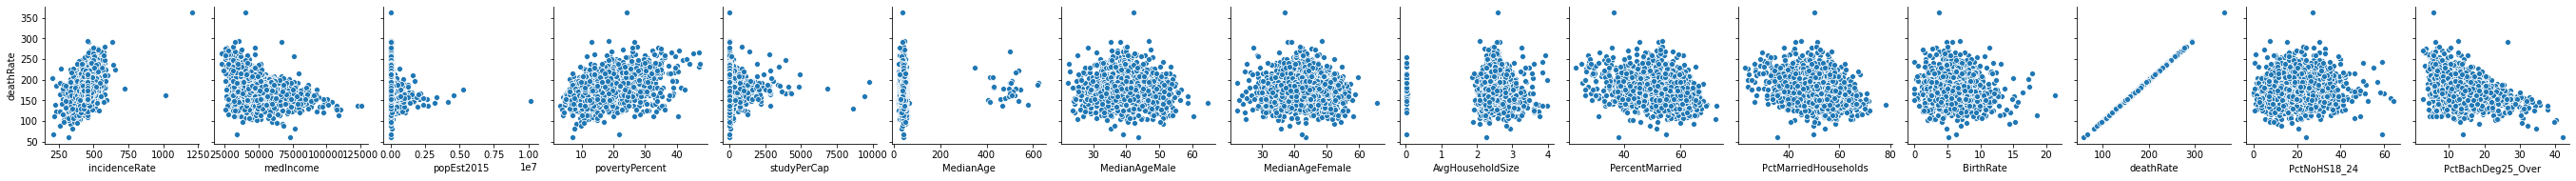

In [2]:
#Have a look at the data
cat_vars = ['binnedInc','modeEdu18_24','modeHI','IDW'] #Categorical variables

pp = sns.pairplot(data=cancer_df,
                  y_vars=['deathRate'],
                  x_vars=cancer_df.loc[:,~cancer_df.columns.isin(cat_vars)].columns)

From the above scattergraphs, deathRate and incidenceRate have outliers which need removing in addition to the errors observed in (2) and (3) which need cleaning.  
I won't remove the outlier for population size as it is unlikely that that variable will be used.
I will also keep the higher valued data points for medIncome and studyPerCap, at this stage, as it isn't unusual for the distribution of wealth and location of studies to be highly skewed and these may be real observations.

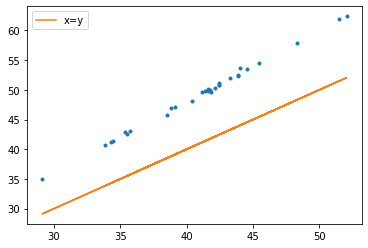

In [3]:
mid_medAge = (cancer_df.loc[cancer_df.MedianAge>100,'MedianAgeMale'] + cancer_df.loc[cancer_df.MedianAge>100,'MedianAgeFemale'])/2
dec_medAge = cancer_df.loc[cancer_df.MedianAge>100,'MedianAge']/10
                            
plt.plot(mid_medAge,dec_medAge,'.')
plt.plot(mid_medAge, mid_medAge,'-',label='x=y')
plt.legend()

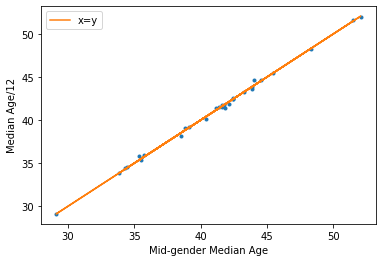

In [4]:
mid_medAge = (cancer_df.loc[cancer_df.MedianAge>100,'MedianAgeMale'] + cancer_df.loc[cancer_df.MedianAge>100,'MedianAgeFemale'])/2
dec_medAge = cancer_df.loc[cancer_df.MedianAge>100,'MedianAge']/12
                            
plt.plot(mid_medAge,dec_medAge,'.')
plt.plot(mid_medAge, mid_medAge,'-',label='x=y')
plt.xlabel('Mid-gender Median Age')
plt.ylabel('Median Age/12')
plt.legend()
plt.savefig('medianAge_y.png')

In [5]:
cancer_df.loc[cancer_df.MedianAge>100,'MedianAge'] = cancer_df.loc[cancer_df.MedianAge>100,'MedianAge']/12

cancer_df.drop(cancer_df[(cancer_df.incidenceRate > 750) | (cancer_df.AvgHouseholdSize < 1)].index, inplace=True)

cancer_df.describe()

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,PctNoHS18_24,PctBachDeg25_Over
count,2984.000000,2984.000000,2.984000e+03,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,447.466650,47117.527145,1.035399e+05,16.865147,156.768178,40.825570,39.567225,42.147621,2.529839,51.806535,51.269165,5.649691,178.524564,18.196816,13.316521
std,51.442693,12092.549917,3.320695e+05,6.428914,534.407316,5.201545,5.236326,5.295375,0.249729,6.876790,6.558231,1.993510,27.509905,8.031959,5.407844
min,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,1.860000,23.100000,22.992490,0.000000,59.700000,0.000000,2.500000
25%,420.075000,38893.000000,1.169350e+04,12.100000,0.000000,37.700000,36.300000,39.100000,2.370000,47.800000,47.819847,4.528808,161.100000,12.775000,9.400000
50%,453.549422,45233.500000,2.684350e+04,15.800000,0.000000,40.900000,39.500000,42.300000,2.500000,52.450000,51.699330,5.383805,178.000000,17.150000,12.300000
75%,480.225000,52535.250000,6.880625e+04,20.400000,83.796343,43.900000,42.600000,45.400000,2.640000,56.400000,55.401921,6.527684,195.125000,22.700000,16.100000
max,651.300000,125635.000000,1.017029e+07,47.400000,9762.308998,65.300000,64.700000,65.700000,3.970000,72.500000,78.075397,21.326165,293.900000,64.100000,42.200000


In [6]:
# (1) Check for colinearity 

cancer_df.loc[:,~cancer_df.columns.isin(cat_vars)].corr() 

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,PctNoHS18_24,PctBachDeg25_Over
incidenceRate,1.000000,-0.000250,0.030857,0.002938,0.084843,0.006000,-0.008181,0.008592,-0.149105,-0.099611,-0.147484,-0.114725,0.443685,-0.174419,-0.044397
medIncome,-0.000250,1.000000,0.235592,-0.788075,0.042568,-0.118815,-0.092017,-0.154337,0.152774,0.354497,0.446697,-0.011651,-0.434894,-0.290898,0.706594
popEst2015,0.030857,0.235592,1.000000,-0.064991,0.054653,-0.178146,-0.177149,-0.179105,0.165647,-0.162287,-0.128823,-0.059062,-0.121721,-0.127322,0.297361
povertyPercent,0.002938,-0.788075,-0.064991,1.000000,-0.054785,-0.192886,-0.214759,-0.147959,0.144781,-0.642764,-0.604739,-0.010450,0.435720,0.291389,-0.534054
studyPerCap,0.084843,0.042568,0.054653,-0.054785,1.000000,-0.031506,-0.036156,-0.030439,-0.030856,-0.039347,-0.052592,0.010571,-0.021784,-0.090093,0.107320
MedianAge,0.006000,-0.118815,-0.178146,-0.192886,-0.031506,1.000000,0.984591,0.977119,-0.616773,0.431497,0.199477,-0.102740,-0.008109,0.110194,-0.147049
MedianAgeMale,-0.008181,-0.092017,-0.177149,-0.214759,-0.036156,0.984591,1.000000,0.933708,-0.587683,0.453656,0.224050,-0.105065,-0.027450,0.102328,-0.127581
MedianAgeFemale,0.008592,-0.154337,-0.179105,-0.147959,-0.030439,0.977119,0.933708,1.000000,-0.634613,0.376228,0.162979,-0.100378,0.011187,0.137842,-0.177649
AvgHouseholdSize,-0.149105,0.152774,0.165647,0.144781,-0.030856,-0.616773,-0.587683,-0.634613,1.000000,-0.205459,0.129889,0.094194,-0.035485,0.151693,-0.042742
PercentMarried,-0.099611,0.354497,-0.162287,-0.642764,-0.039347,0.431497,0.453656,0.376228,-0.205459,1.000000,0.870671,0.137482,-0.269426,-0.014268,0.106923


Highly correlated variables: 
* povertyPercent with medIncome, PercentMarried, PctMarriedHouseholds and to lesser extent PctBachDeg25_Over are all correlated with each other. The categorical variable binnedInc should be added to this group as it is a function of medIncome.
* MedianAgeMale and Female, MedianAge and average household size.
* There is no indication of a linear relationship between deathRate and population size, number of studies(*), the median age group (*), birthrate and proportion of 18-24y.o. with no high school education (*). 
* Heuristically there is no apparent reason for including population size and birth rate in  a model for cancer death rate but the other variables (*) should still be examined for a potential non-linear relationship.

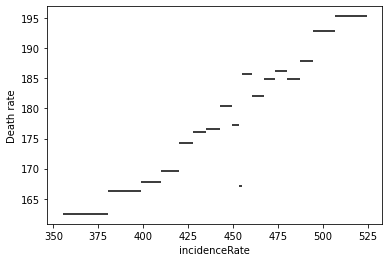

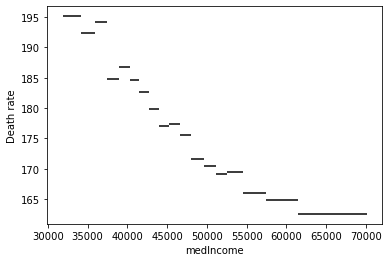

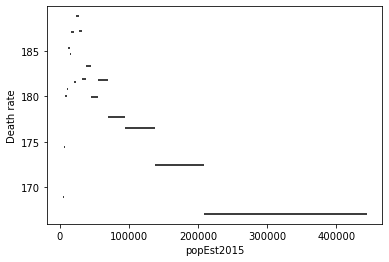

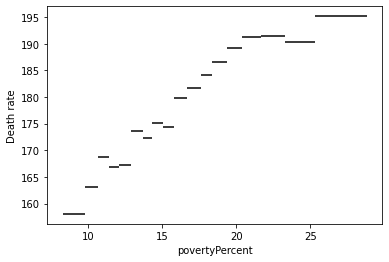

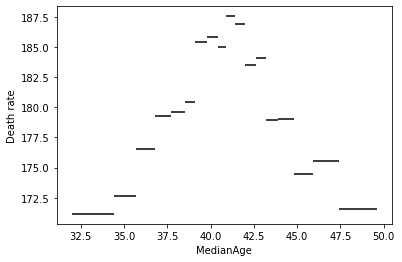

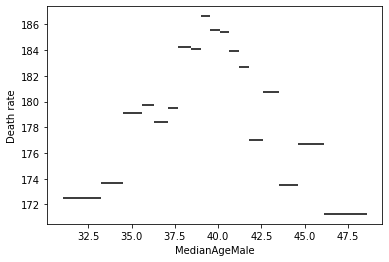

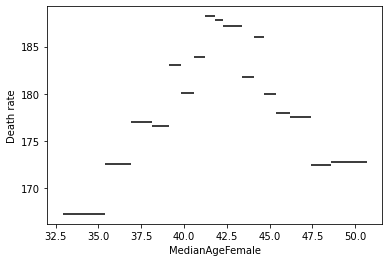

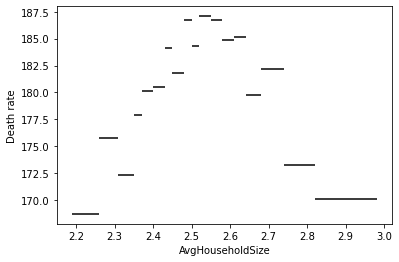

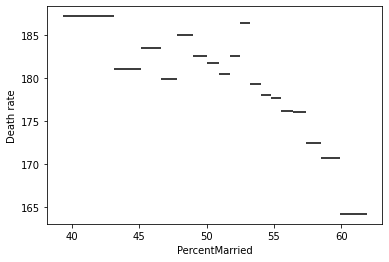

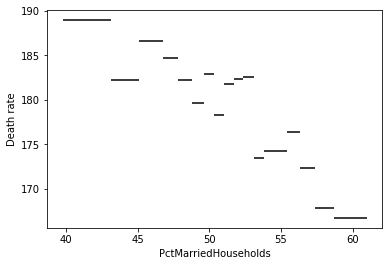

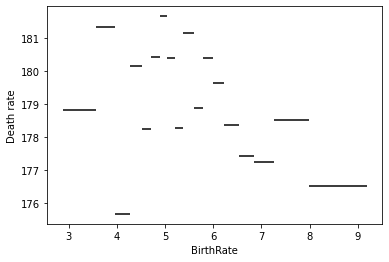

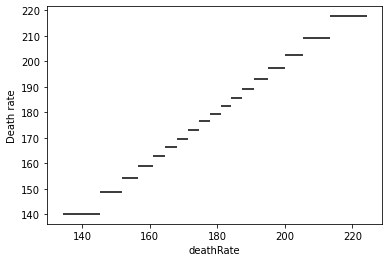

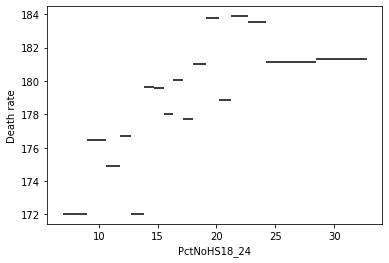

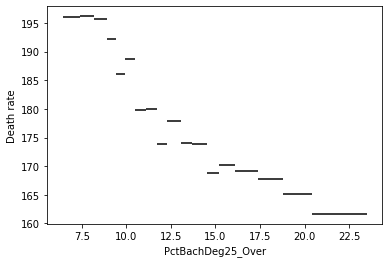

incidenceRate           None
medIncome               None
popEst2015              None
povertyPercent          None
MedianAge               None
MedianAgeMale           None
MedianAgeFemale         None
AvgHouseholdSize        None
PercentMarried          None
PctMarriedHouseholds    None
BirthRate               None
deathRate               None
PctNoHS18_24            None
PctBachDeg25_Over       None
dtype: object

In [7]:
def binned_stats(var):
    bin_means, bin_edges, binnumber = stats.binned_statistic(var,
                       cancer_df.deathRate,
                       statistic='mean', 
                       bins=np.quantile(var,np.arange(0.05,1,0.05)))
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])
    plt.xlabel(var.name)
    plt.ylabel('Death rate')
    plt.savefig('{}.png'.format(var.name))
    plt.show()

cat_vars.extend(['studyPerCap'])
cancer_df.loc[:,~cancer_df.columns.isin(cat_vars)].apply(binned_stats,axis=0)

* The above figure of death rate by binned incidenceRate appears to have a positive linear relationship as expected.
* From the income group, I will keep medIncome as a more direct measurement (this is subjective and any other choice with provided justification is good). I will add a quadratic term to account for the nonlinearity seen in the death rate by binned medIncome figure above. 
* From the age group I will keep medianAge as the structure is clearer and it represents all the population (again any other choice with reasonable justification is good). 
* A quadratic will be fitted for MedianAge to account for the non-linearity.
* PctNoHS18_24 might be suitable as a categorical vatiable


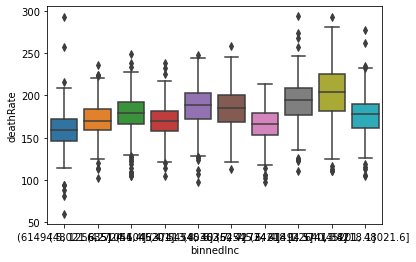

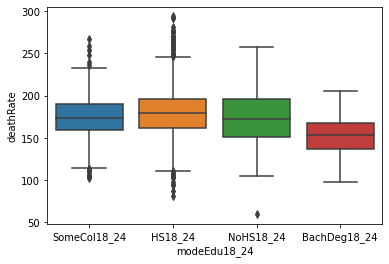

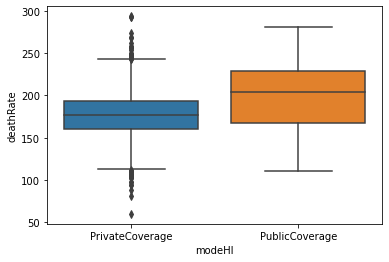

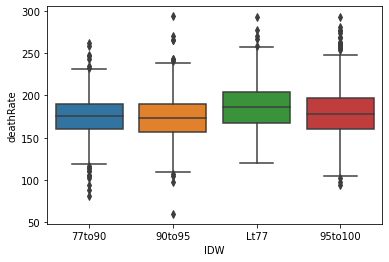

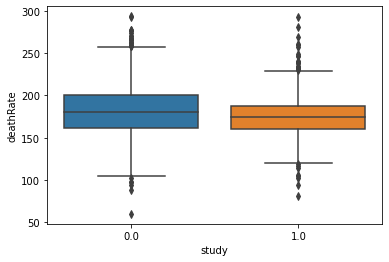

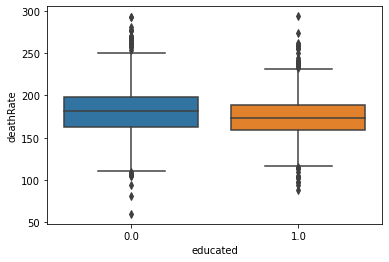

In [8]:
#Examine the categorical variables.

cancer_df.loc[cancer_df.studyPerCap == 0,'study'] = 0
cancer_df.loc[cancer_df.studyPerCap > 0,'study'] = 1

cancer_df.loc[cancer_df.PctNoHS18_24 < 15,'educated'] = 1
cancer_df.loc[cancer_df.PctNoHS18_24 >= 15,'educated'] = 0

cat_vars.extend(['study','educated'])
cat_vars.remove('studyPerCap')
for var in cancer_df.loc[:,cat_vars]:
    plt.figure()
    sns.boxplot(x=var, y="deathRate", data=cancer_df)
    plt.savefig('{}.png'.format(var))

Fom the above boxplots:
* There is support for including health insurance coverage and IDW in the model.
* More highly educated counties appear to have a lower death rate but similarly to the degree variable for more than 25y.o. this is likely to be associated with wealth.

### Question 2

Use the suitably modified data from question 1 to fit a linear regression model. Examine the suitability of your chosen model. 

In your Latex document, discuss the suitability of the model you fitted. 

In [9]:
#Create dummy variables
cancer_df['PublicInsurance'] = (cancer_df.modeHI == 'PublicCoverage').astype(int)
cancer_df['PrivateInsurance'] = (cancer_df.modeHI == 'PrivateCoverage').astype(int)

cancer_df['IDW_lt77'] = (cancer_df.IDW == 'Lt77').astype(int)
cancer_df['IDW_77to95'] = ((cancer_df.IDW == '77to90')|(cancer_df.IDW == '90to95')).astype(int)
cancer_df['IDW_95to100'] = (cancer_df.IDW == '95to100').astype(int)

cancer_df.loc[1:10,('PublicInsurance','PrivateInsurance','modeHI','IDW_lt77','IDW_77to95','IDW_95to100','IDW')]

,PublicInsurance,PrivateInsurance,modeHI,IDW_lt77,IDW_77to95,IDW_95to100,IDW
1,0,1,PrivateCoverage,0,1,0,77to90
2,0,1,PrivateCoverage,0,1,0,77to90
3,0,1,PrivateCoverage,0,1,0,90to95
4,0,1,PrivateCoverage,0,1,0,90to95
5,0,1,PrivateCoverage,0,1,0,90to95
6,0,1,PrivateCoverage,0,1,0,77to90
7,0,1,PrivateCoverage,1,0,0,Lt77
8,0,1,PrivateCoverage,0,1,0,77to90
9,0,1,PrivateCoverage,0,1,0,90to95
10,0,1,PrivateCoverage,1,0,0,Lt77


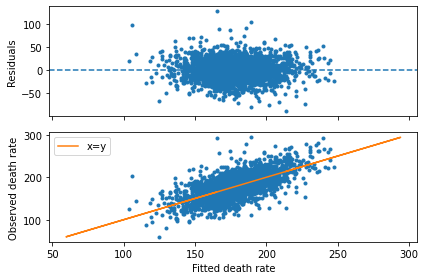

In [14]:
import sklearn.linear_model as sk_lm

df2 = cancer_df.copy() #Make a copy of the dataframe
df2.drop(columns=['popEst2015', 'povertyPercent','studyPerCap', 'binnedInc', 'MedianAgeMale',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctMarriedHouseholds', 'BirthRate', 'modeEdu18_24',
       'PctBachDeg25_Over', 'modeHI', 'IDW', 'study', 'deathRate','PctNoHS18_24','educated'],axis=0,inplace=True) 
#Remove the columns we don't want, axis=0 - columns, inplace - delete from itself and don't return anything.

n = len(cancer_df.deathRate)
X = np.c_[np.ones(n), df2, df2.medIncome**2, df2.MedianAge**2] 

#Regression
linear_model = sk_lm.LinearRegression(fit_intercept=False)
reg = linear_model.fit(X, cancer_df.deathRate)
fitted_deathRate = reg.predict(X)
residuals = cancer_df.deathRate - fitted_deathRate

#Plot residuals and observed data vs fits 
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.plot(fitted_deathRate, residuals,'.')
ax1.set_ylabel("Residuals")
ax1.axhline(y=0, ls='--')

ax2.plot(fitted_deathRate, cancer_df.deathRate,'.')
ax2.plot(cancer_df.deathRate, cancer_df.deathRate,'-',label='x=y')
ax2.set_ylabel("Observed death rate")
ax2.set_xlabel("Fitted death rate")
ax2.legend()

plt.tight_layout()
plt.savefig('residuals.png')

In [15]:
import sklearn.metrics as sk_metrics
def rmse(obs, pred, axis=1):
    return np.sqrt(sk_metrics.mean_squared_error(obs, pred))


#Print outputs
coef_names = df2.columns.tolist()
coef_names.extend(['medIncome^2', 'MedianAge^2'])
coef_names.insert(0,'Intercept')
print(np.c_[coef_names,reg.coef_])
print(r'RMSE {:.3f}'.format(rmse(cancer_df.deathRate,fitted_deathRate)))

[['Intercept' '9.342906752643556']
 ['incidenceRate' '0.22591516293090042']
 ['medIncome' '-0.002381288123597523']
 ['MedianAge' '7.508737135498736']
 ['PublicInsurance' '7.6599282218083085']
 ['PrivateInsurance' '1.682978530834414']
 ['IDW_lt77' '5.037958216688181']
 ['IDW_77to95' '1.6314658627169338']
 ['IDW_95to100' '2.673482673238452']
 ['medIncome^2' '1.26790193506789e-08']
 ['MedianAge^2' '-0.09506718578903749']]
RMSE 20.586


In [16]:
print(reg.coef_[2]*np.min(df2.medIncome)+reg.coef_[9]*np.min(df2.medIncome)**2,
      reg.coef_[2]*np.mean(df2.medIncome)+reg.coef_[9]*np.mean(df2.medIncome)**2,
     reg.coef_[2]*np.max(df2.medIncome)+reg.coef_[9]*np.max(df2.medIncome)**2)
print(reg.coef_[3]*np.min(df2.MedianAge)+reg.coef_[10]*np.min(df2.MedianAge)**2,
      reg.coef_[3]*np.mean(df2.MedianAge)+reg.coef_[10]*np.mean(df2.MedianAge)**2,
     reg.coef_[3]*np.max(df2.MedianAge)+reg.coef_[10]*np.max(df2.MedianAge)**2)

-47.41348324127817 -84.05220680625727 -99.04554923431905
120.16887730059136 148.09741247858173 84.94549869689064


In [17]:
#Examine effect of incidence rate
df2.drop(columns=['incidenceRate'],axis=0,inplace=True) 

n = len(cancer_df.deathRate)
X = np.c_[np.ones(n), df2, df2.medIncome**2, df2.MedianAge**2] 

#Regression
linear_model = sk_lm.LinearRegression(fit_intercept=False)
reg = linear_model.fit(X, cancer_df.deathRate)
fitted_deathRate = reg.predict(X)

#Print outputs
coef_names = df2.columns.tolist()
coef_names.extend(['medIncome^2', 'MedianAge^2'])
coef_names.insert(0,'Intercept')
print(np.c_[coef_names,reg.coef_])
print(r'RMSE {:.3f}'.format(rmse(cancer_df.deathRate,fitted_deathRate)))

[['Intercept' '24.149248243365925']
 ['medIncome' '-0.0023134557955005325']
 ['MedianAge' '11.124280736106453']
 ['PublicInsurance' '14.372459182442803']
 ['PrivateInsurance' '9.776789060942185']
 ['IDW_lt77' '10.061876894633317']
 ['IDW_77to95' '5.7603357648939655']
 ['IDW_95to100' '8.327035583838608']
 ['medIncome^2' '1.1955206528842476e-08']
 ['MedianAge^2' '-0.13969492183933235']]
RMSE 23.548
